# Automatized Prediction for House Prices

In this program we will predict the price of a house of any mexican city, since the website where we are going to fetch the Data only have mexican cities.

First we'll read the mexican city we want for make the prediction there, then Selenium will get the URL of the website and then we'll make staticians operations for the prediction of the price with the size of the house.

**Cautions**
*If you download this notebook and dont work is because you have to download the newest version of Google Chrome driver*

#### Import the functions from Selenium

In [27]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

- Read the txt that have the city or Countie (int his example we have the countie of "Huixquilucan" which is in Estado de Mexico)
- Start the Selenium Navegation Options
- Open the a new in google, so Slenium can works there
- Open the page of the houses, Search the city or countie, get the URL

In [ ]:
with open('city.txt', 'r') as archivo:
    city = archivo.read()

# Navegation Options
options =  webdriver.ChromeOptions()
options.add_argument('--start-maximized')
options.add_argument('--disable-extensions')
driver_path = 'chromedriver.exe'
driver = webdriver.Chrome(driver_path, chrome_options=options)

# Open a second screen for Selenium
driver.set_window_position(2000, 0)
driver.maximize_window()

# Go to the website 
driver.get("https://www.flat.mx/venta/propiedades-en-ciudad-de-mexico")

#Search the city or countie in the Website
WebDriverWait(driver, 5)\
    .until(EC.element_to_be_clickable((By.CSS_SELECTOR,'input')))\
    .send_keys(city)
    
time.sleep(5)
    
WebDriverWait(driver, 5)\
    .until(EC.element_to_be_clickable((By.CSS_SELECTOR,'input')))\
    .send_keys(Keys.RETURN)

# Get the URL 
url=driver.current_url
print(url)
time.sleep(5)
driver.quit()

#### Import the other libraries to make Web Scrapping and Data Analysis

In [29]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as plt

- Fetch all the data from the website that has the houses in the city we want
- Save the prices of each house in a list

In [30]:

# Get the HTML
pagina=requests.get(url)
sopa=BeautifulSoup(pagina.content,"html.parser")
datos=sopa.find_all('p',class_="flex items-center gap-[0.625rem] truncate font-montserrat text-sm font-bold tabular-nums text-emerald md:text-base")

# Save the prices
prices=list()
for x in datos:
    prices.append(x.text.split('$')[1])

- Do data cleaning
- Get the sizes of the houses and save them in another list

In [31]:
# Cast from string to integer
for x in range(len(prices)):
  prices[x]= prices[x].replace(',', '')
  prices[x]= prices[x].split(" ")
  prices[x]=prices[x][0]
  prices[x] = int(prices[x])

# Get the sizes
datos=sopa.find_all ('span', class_="ml-2 truncate font-montserrat text-xs font-bold tabular-nums text-black")
sizes=[]
for x in datos:
  z=x.text
  if('m²' in z):
    sizes.append(int(z.split()[0]))

In [32]:
print('Prices ---> ', prices)
print('Sizes ---> ', sizes)

#check both lists have the same size and we do all correctly
print(f'\nThe lenght of the prices\' list is {len(prices)}')
print(f'The lenght of the sizes\' list is {len(sizes)}')

#Get their Correlation Coeficient
print('\nThe Correlation Coeficient is',np.corrcoef(sizes, prices)[0][1])

Prices --->  [2265000, 2595000, 4000000, 7200000, 2350000, 1749998, 2990000, 7500000, 2800000, 3100000, 3300000, 4580000, 8490000, 5500000, 10000000, 12000000, 8800000, 6600000, 13900000, 7800000]
Sizes --->  [85, 102, 180, 285, 68, 50, 104, 295, 76, 126, 96, 160, 259, 401, 450, 290, 262, 196, 522, 195]

The lenght of the prices' list is 20
The lenght of the sizes' list is 20

The Correlation Coeficient is 0.8640586978317497


#### Create a Linear Regression without libraries so we can know how it works

In [33]:
n=len(prices)
ymedia=np.mean(prices)
xmedia=np.mean(sizes)
sx, sy, sx2, sy2, sxy = 0, 0, 0, 0, 0
for i in range(n):
    sx+=sizes[i]
    sy+=prices[i]
    sxy+=sizes[i]*prices[i]
    sx2+=sizes[i]**2
    sy2+=prices[i]**2
    
# Get the coeficients for the Straight Line Formula
b1=(n*(sxy)-(sx*sy))/(n*sx2-(sx**2))
b0=ymedia-(b1*xmedia)
print("\nb1:", round(b1,2), "  b0: ", round(b0,2))


b1: 22586.96   b0:  1130478.75


#### Create The Linear Regression

In [34]:
ynew=[]
for i in range(len(sizes)):
    ynew.append(b0+b1*sizes[i])

#### Plot the Results

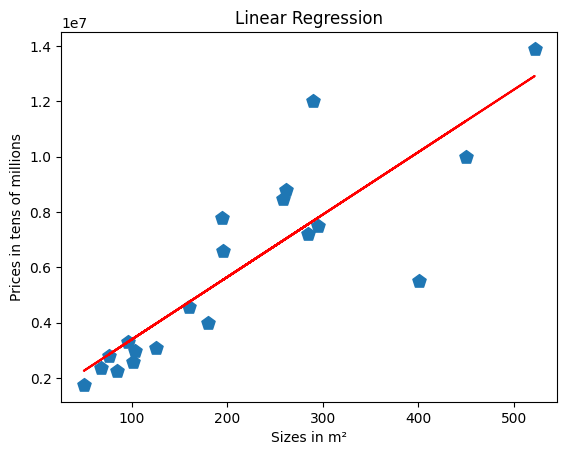

In [35]:
plt.scatter(sizes,prices, marker='p', s=100)
plt.plot(sizes,ynew, c='red')
plt.xlabel('Sizes in m²')
plt.ylabel('Prices in tens of millions')
plt.title('Linear Regression')
plt.show()

In [36]:
print("A house of 100m² in", city, "will be around: $", round(b0+b1*100), 'mexican pesos')

A house of 100m² in Huixquilucan will be around: $ 3389175 mexican pesos


#### We can see that this code works very good for the prediction of a house in the city we want.
#### we can also make another type of analysis between cities in a very simple way, since the automation is of great help; we only have to change the city we want in the txt file and the program will do all the dirty work :)